# Multi model comparison

In [1]:
import numpy as np
import modelskill as ms

## Define observations

In [2]:
fldr = '../tests/testdata/SW/'
o1 = ms.PointObservation(fldr + 'HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation(fldr + "eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation(fldr + "Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define models

In [3]:
mr1 = ms.ModelResult(fldr + 'HKZN_local_2017_DutchCoast.dfsu', name='SW_1', item=0)
mr2 = ms.ModelResult(fldr + 'HKZN_local_2017_DutchCoast_v2.dfsu', name='SW_2', item=0)

## Get spatial and temporal overview

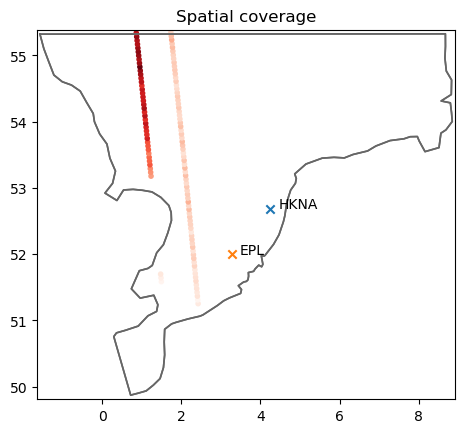

In [4]:
ms.plot_spatial_overview(obs=[o1, o2, o3], mod=[mr1, mr2]);

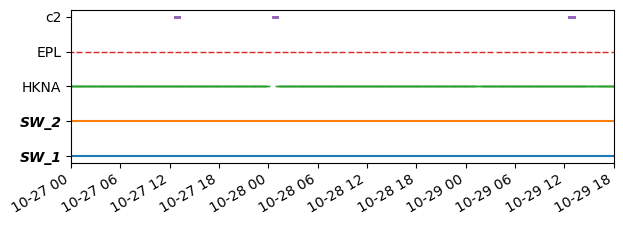

In [5]:
ms.plot_temporal_coverage(obs=[o1, o2, o3], mod=[mr1, mr2]);

## Compare 

In [6]:
cc = ms.compare(obs=[o1, o2, o3], mod=[mr1, mr2])    # returns a collection of comparisons

In [7]:
cc["EPL"]   # select a single comparer from the collection like this

<Comparer>
Quantity: Significant wave height [meter]
Observation: EPL, n_points=67
 Model: SW_1, rmse=0.224
 Model: SW_2, rmse=0.232

## Perform analysis
You can perform simple filtering on specific `observation` or specific `model`. You can refer to observations and models using their _name_ or _index_. 

The main analysis methods are:
* skill()
* mean_skill()
* scatter()
* taylor()

In [8]:
cc.skill()

n      bias      rmse     urmse       mae        cc  \
model observation                                                          
SW_1  EPL           67 -0.066597  0.223597  0.213449  0.188513  0.969846   
      HKNA         386 -0.194260  0.351964  0.293499  0.251839  0.971194   
      c2           113 -0.001210  0.351797  0.351794  0.294585  0.974335   
SW_2  EPL           67 -0.000199  0.232479  0.232479  0.198294  0.969846   
      HKNA         386 -0.100426  0.293033  0.275287  0.214422  0.971194   
      c2           113  0.081431  0.430268  0.422492  0.357138  0.974335   

                         si        r2  
model observation                      
SW_1  EPL          0.082522  0.932596  
      HKNA         0.094489  0.905300  
      c2           0.127776  0.899507  
SW_2  EPL          0.089879  0.927134  
      HKNA         0.088626  0.934358  
      c2           0.153454  0.849675

In [9]:
cc.sel(observation="c2").skill()

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
SW_1,c2,113,-0.001210,0.351797,0.351794,0.294585,0.974335,0.127776,0.899507
SW_2,c2,113,0.081431,0.430268,0.422492,0.357138,0.974335,0.153454,0.849675


In [10]:
cc.sel(model=0, observation=[0,"c2"]).mean_skill()

,n,bias,rmse,urmse,mae,cc,si,r2
SW_1,499,-0.097735,0.35188,0.322647,0.273212,0.972764,0.111132,0.902404


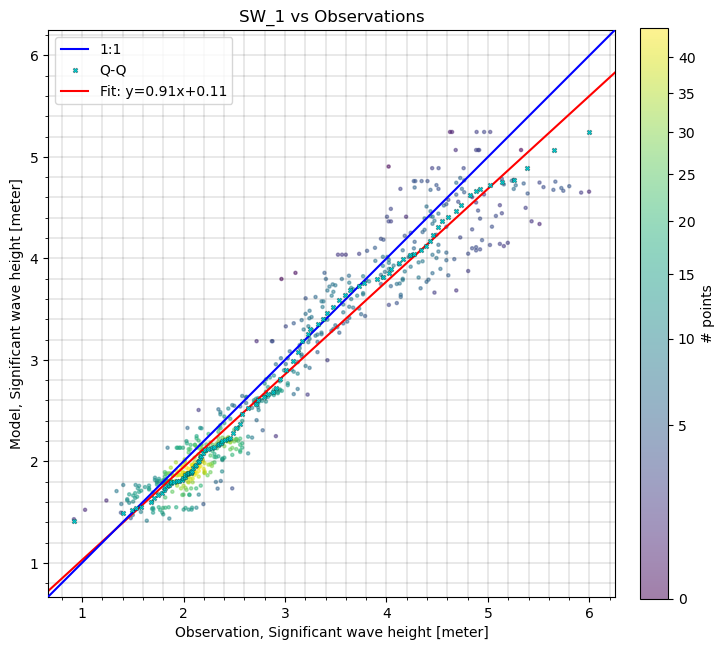

In [11]:
cc.sel(model='SW_1').scatter();

C:\Users\jem\Source\modelskill\modelskill\comparison.py:1926: FutureWarning: The 'observation' argument is deprecated, use 'sel(observation='None)' instead
  warnings.warn(
C:\Users\jem\Source\modelskill\modelskill\comparison.py:1933: FutureWarning: The 'variable' argument is deprecated, use 'sel(variable='None)' instead
  warnings.warn(


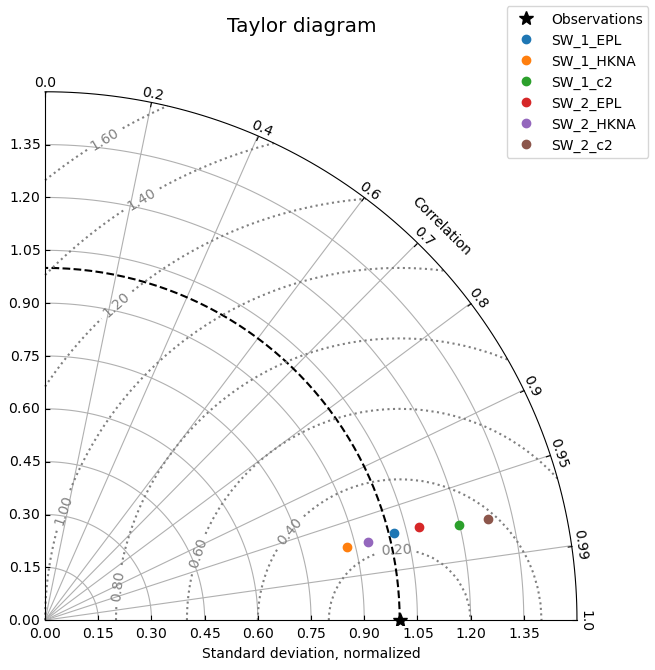

In [12]:
cc.taylor(normalize_std=True, aggregate_observations=False)

### Time series plot (specifically for point comparisons)
If you select an comparison from the collection which is a PointComparer, you can do a time series plot

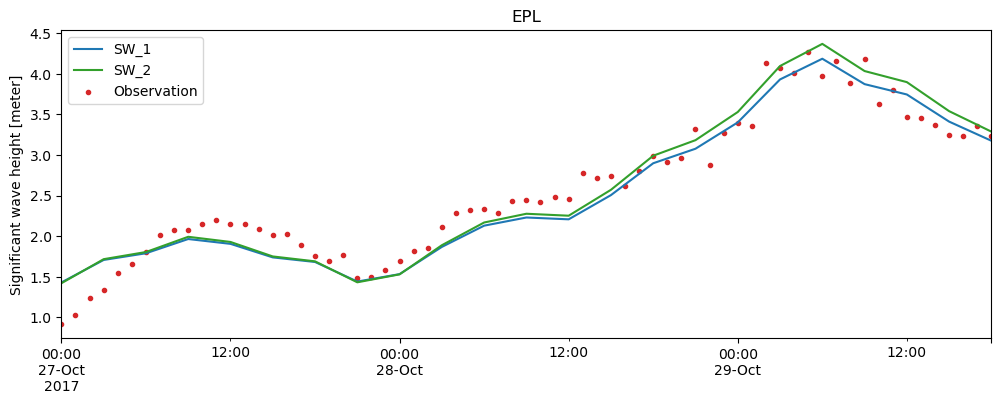

In [13]:
cc['EPL'].plot_timeseries(figsize=(12,4));

## Filtering on time
Use the `start` and `end` arguments to do your analysis on part of the time series

In [14]:
cc.sel(model="SW_1", end='2017-10-28').skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,48,-0.100116,0.238728,0.216721,0.203709,0.919574,0.100918,0.812073
HKNA,281,-0.097075,0.203241,0.178559,0.164563,0.968106,0.070167,0.916126
c2,72,-0.188193,0.313787,0.251089,0.258661,0.478554,0.123019,-1.420894


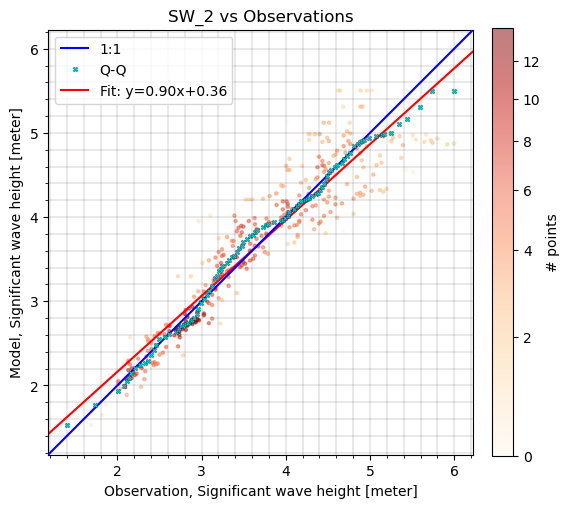

In [15]:
cc.sel(model='SW_2', start='2017-10-28').scatter(cmap='OrRd', figsize=(6,7));

## Filtering on area
You can do you analysis in a specific `area` by providing a bounding box or a closed polygon

In [16]:
bbox = np.array([0.5,52.5,5,54])
polygon = np.array([[6,51],[0,55],[0,51],[6,51]])

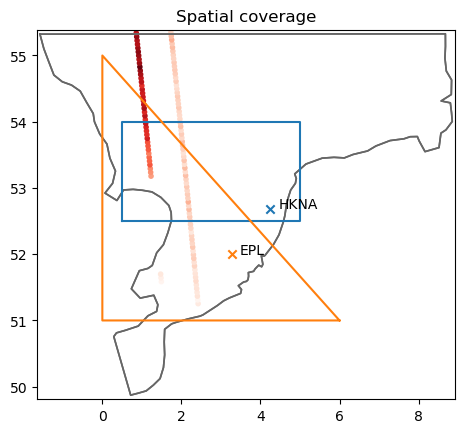

In [17]:
ax = ms.plot_spatial_overview(obs=[o1, o2, o3], mod=[mr1, mr2]);
ax.plot([bbox[0],bbox[2],bbox[2],bbox[0],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3],bbox[1]]);
ax.plot(polygon[:,0],polygon[:,1]);

In [18]:
cc.sel(model="SW_1", area=bbox).skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
HKNA,386,-0.19426,0.351964,0.293499,0.251839,0.971194,0.094489,0.905300
c2,42,-0.05587,0.388404,0.384365,0.336023,0.952688,0.145724,0.749645


In [19]:
cc.sel(model="SW_2", area=polygon).scatter(backend='plotly')

## Skill object

The skill() and mean_skill() methods return a skill object that can visualize results in various ways. The primary methods of the skill object are:

* style()
* plot_bar()
* plot_line()
* plot_grid()
* sel()

In [20]:
s = cc.skill()

In [21]:
s.style()

In [22]:
s.style(columns='rmse')

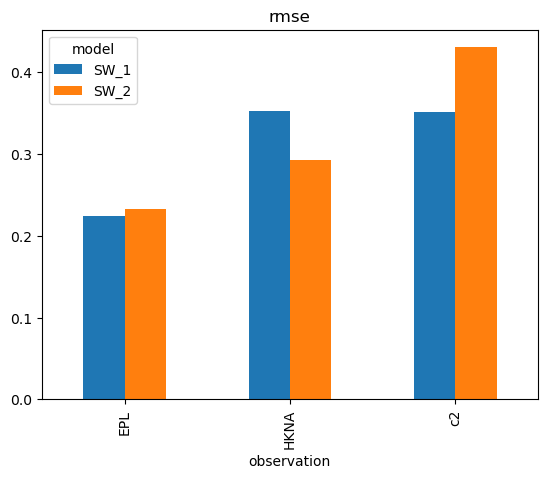

In [23]:
s.plot_bar('rmse');

In [24]:
s = cc.skill(by=['model','freq:12H'], metrics=['bias','rmse','si'])

In [25]:
s.style()

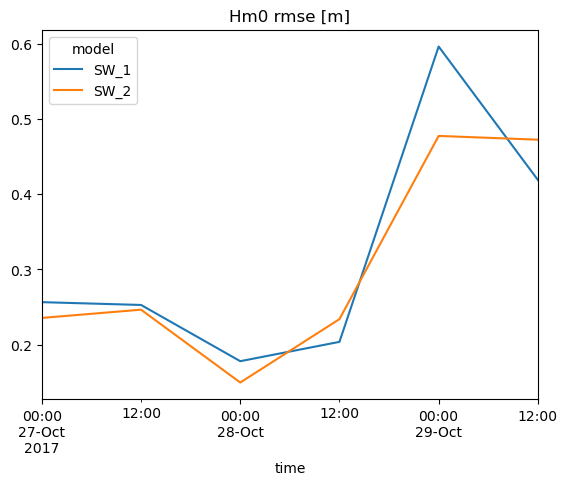

In [26]:
s.plot_line('rmse', title='Hm0 rmse [m]');

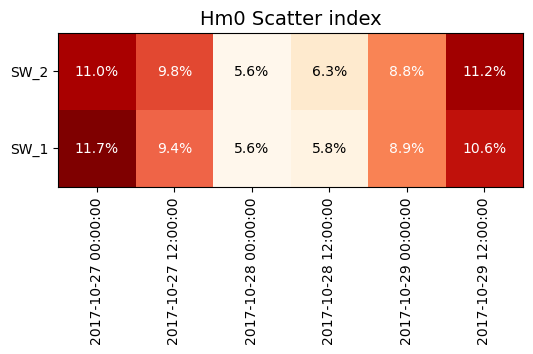

In [27]:
s.plot_grid('si', fmt='0.1%', title='Hm0 Scatter index');

### The sel() method can subset the skill object 

A new skill object will be returned

In [28]:
s = cc.skill()
s.style()

In [29]:
s.sel(model='SW_1').style()

,model,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,,
EPL,SW_1,67,-0.067,0.224,0.213,0.189,0.970,0.083,0.933
HKNA,SW_1,386,-0.194,0.352,0.293,0.252,0.971,0.094,0.905
c2,SW_1,113,-0.001,0.352,0.352,0.295,0.974,0.128,0.900


In [30]:
s.sel(observation='HKNA').style()

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
SW_1,HKNA,386,-0.194,0.352,0.293,0.252,0.971,0.094,0.905
SW_2,HKNA,386,-0.100,0.293,0.275,0.214,0.971,0.089,0.934


In [31]:
s.sel('rmse>0.25').style()

In [32]:
s.sel('rmse>0.3', columns=['rmse','mae']).style()